# House Price Regression Project

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

# Data Ingestion

In [2]:
import pandas as pd

In [3]:
path = r"C:\Users\Saurav Mali\Downloads\BasicPython\Python Recording\python Class\MACHINE LEARNING\ML PDF AND CSV\MLR PROJECT\training_set.csv"

In [4]:
df = pd.read_csv(path, na_values=["", "NA"], keep_default_na=False)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Target Feature - Sales Price

# Data quality chceck

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
m = df.isna().sum()
m [m>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

# Separate X and Y(SalePrice)

In [8]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
X = df.drop(columns = ["Id", "SalePrice"])
Y = df[["SalePrice"]]

In [10]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [11]:
Y.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


<Axes: xlabel='SalePrice', ylabel='Count'>

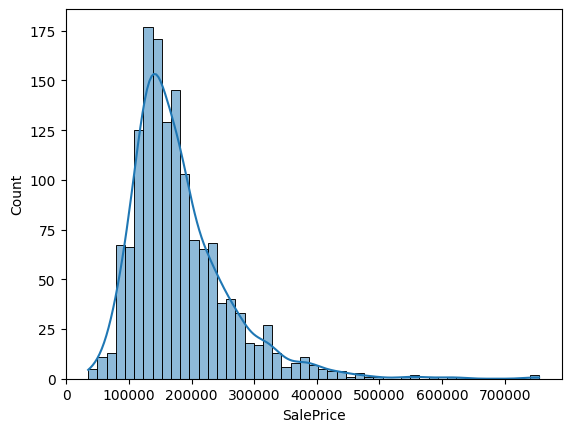

In [12]:
import seaborn as sns
sns.histplot(data=df, x="SalePrice", kde=True)

In [13]:
X.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 79, dtype: object

In [14]:
cat = list(X.columns[X.dtypes=="object"])
con = list(X.columns[X.dtypes!="object"])

In [15]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [16]:
con

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [17]:
from sklearn.pipeline import make_pipeline # To perform multiple operations in one go
from sklearn.impute import SimpleImputer # To replace missing values
from sklearn.preprocessing import StandardScaler, OrdinalEncoder # Converting all data in numerical format
from sklearn.compose import ColumnTransformer # Combinig numerical and categorical pipeline

In [18]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
)

In [19]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="Not_Avl"),
    OrdinalEncoder()
)

In [20]:
pre1 = ColumnTransformer(
    [
        ("num",num_pipe,con),
        ("cat",cat_pipe,cat)
    ]
).set_output(transform="pandas")

In [21]:
pre1

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['MSSubClass', 'LotFrontage', 'LotArea',
                                  'OverallQual', 'OverallCond', 'YearBuilt',
                                  'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                                  'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                                  '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                                  'GrLivArea', 'BsmtFullBath', '...
                                 ['MSZoning', 'Street', 'Alley', 'LotShape',
                                  'LandContour', 'Utilities', 'LotConfig',
                                  'LandSlope', 'Neighborhood', 'Condition1',
                                  'Condition2', 'BldgType', 'HouseStyle',
                                  'RoofStyle', 'RoofMatl', 'Exterior1st',
                                  'Exterior2nd', 'MasVnrType', 'ExterQual',
                                  'ExterCond', 'Foundation', 'BsmtQual',
                                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                                  'BsmtFinType2', 'Heating', 'HeatingQC',
                                  'CentralAir', 'Electrical', ...])])

In [22]:
X_pre = pre1.fit_transform(X)
X_pre.head()

,num__MSSubClass,num__LotFrontage,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__YearRemodAdd,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,...,cat__GarageType,cat__GarageFinish,cat__GarageQual,cat__GarageCond,cat__PavedDrive,cat__PoolQC,cat__Fence,cat__MiscFeature,cat__SaleType,cat__SaleCondition
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
1,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
2,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
3,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,-0.288653,...,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,0.0
4,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0


In [23]:
pre1

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['MSSubClass', 'LotFrontage', 'LotArea',
                                  'OverallQual', 'OverallCond', 'YearBuilt',
                                  'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                                  'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                                  '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                                  'GrLivArea', 'BsmtFullBath', '...
                                 ['MSZoning', 'Street', 'Alley', 'LotShape',
                                  'LandContour', 'Utilities', 'LotConfig',
                                  'LandSlope', 'Neighborhood', 'Condition1',
                                  'Condition2', 'BldgType', 'HouseStyle',
                                  'RoofStyle', 'RoofMatl', 'Exterior1st',
                                  'Exterior2nd', 'MasVnrType', 'ExterQual',
                                  'ExterCond', 'Foundation', 'BsmtQual',
                                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                                  'BsmtFinType2', 'Heating', 'HeatingQC',
                                  'CentralAir', 'Electrical', ...])])

# Feature Selection

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

In [25]:
model = LinearRegression()

sel = SequentialFeatureSelector(model,direction="backward",n_features_to_select="auto")

sel.fit(X_pre,Y)

SequentialFeatureSelector(direction='backward', estimator=LinearRegression())

In [26]:
imp_cols = sel.get_feature_names_out()
imp_cols

array(['num__MSSubClass', 'num__LotArea', 'num__OverallQual',
       'num__OverallCond', 'num__YearBuilt', 'num__MasVnrArea',
       'num__BsmtFinSF1', 'num__BsmtFinSF2', 'num__BsmtUnfSF',
       'num__TotalBsmtSF', 'num__1stFlrSF', 'num__2ndFlrSF',
       'num__LowQualFinSF', 'num__GrLivArea', 'num__BsmtFullBath',
       'num__KitchenAbvGr', 'num__TotRmsAbvGrd', 'num__Fireplaces',
       'num__GarageCars', 'num__WoodDeckSF', 'num__ScreenPorch',
       'num__PoolArea', 'num__YrSold', 'cat__LandContour',
       'cat__Utilities', 'cat__Neighborhood', 'cat__BldgType',
       'cat__HouseStyle', 'cat__RoofMatl', 'cat__Exterior1st',
       'cat__ExterQual', 'cat__BsmtQual', 'cat__BsmtCond',
       'cat__BsmtExposure', 'cat__HeatingQC', 'cat__KitchenQual',
       'cat__Functional', 'cat__FireplaceQu', 'cat__GarageCond',
       'cat__MiscFeature'], dtype=object)

In [27]:
len(imp_cols)

40

In [28]:
imp_cols[0]

'num__MSSubClass'

In [29]:
imp_cols[0].split("__")

['num', 'MSSubClass']

In [30]:
imp_cols[0].split("__")[1]

'MSSubClass'

In [31]:
imp_sel_cols = [col.split("__")[1] for col in imp_cols]
imp_sel_cols

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'ScreenPorch',
 'PoolArea',
 'YrSold',
 'LandContour',
 'Utilities',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofMatl',
 'Exterior1st',
 'ExterQual',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageCond',
 'MiscFeature']

In [32]:
X_sel = X[imp_sel_cols]
X_sel.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,ExterQual,BsmtQual,BsmtCond,BsmtExposure,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageCond,MiscFeature
0,60,8450,7,5,2003,196.0,706,0,150,856,...,Gd,Gd,TA,No,Ex,Gd,Typ,NaN,TA,NaN
1,20,9600,6,8,1976,0.0,978,0,284,1262,...,TA,Gd,TA,Gd,Ex,TA,Typ,TA,TA,NaN
2,60,11250,7,5,2001,162.0,486,0,434,920,...,Gd,Gd,TA,Mn,Ex,Gd,Typ,TA,TA,NaN
3,70,9550,7,5,1915,0.0,216,0,540,756,...,TA,TA,Gd,No,Gd,Gd,Typ,Gd,TA,NaN
4,60,14260,8,5,2000,350.0,655,0,490,1145,...,Gd,Gd,TA,Av,Ex,Gd,Typ,TA,TA,NaN


# Preprocessing pipeline for X_sel

In [33]:
cat_sel = list(X_sel.columns[X_sel.dtypes == "object"])
con_sel = list(X_sel.columns[X_sel.dtypes != "object"])

In [34]:
cat_sel

['LandContour',
 'Utilities',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofMatl',
 'Exterior1st',
 'ExterQual',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageCond',
 'MiscFeature']

In [35]:
con_sel

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'ScreenPorch',
 'PoolArea',
 'YrSold']

In [36]:
from sklearn.preprocessing import OneHotEncoder


In [37]:
num_pipe2= make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

In [38]:
cat_pipe2 = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="Not_Avl"),
    OneHotEncoder(handle_unknown="ignore",sparse_output=False)
)

In [39]:
pre2 = ColumnTransformer(
    [
        ("num",num_pipe2,con_sel),
        ("cat",cat_pipe2,cat_sel)
    ]
).set_output(transform="pandas")

In [40]:
pre2

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['MSSubClass', 'LotArea', 'OverallQual',
                                  'OverallCond', 'YearBuilt', 'MasVnrArea',
                                  'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                                  'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                                  'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
                                  'KitchenAbvGr...
                                                  SimpleImputer(fill_value='Not_Avl',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['LandContour', 'Utilities', 'Neighborhood',
                                  'BldgType', 'HouseStyle', 'RoofMatl',
                                  'Exterior1st', 'ExterQual', 'BsmtQual',
                                  'BsmtCond', 'BsmtExposure', 'HeatingQC',
                                  'KitchenQual', 'Functional', 'FireplaceQu',
                                  'GarageCond', 'MiscFeature'])])

In [41]:
X_sel_pre = pre2.fit_transform(X_sel)
X_sel_pre

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,num__BsmtUnfSF,num__TotalBsmtSF,...,cat__GarageCond_Fa,cat__GarageCond_Gd,cat__GarageCond_Not_Avl,cat__GarageCond_Po,cat__GarageCond_TA,cat__MiscFeature_Gar2,cat__MiscFeature_Not_Avl,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC
0,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.514104,0.575425,-0.288653,-0.944591,-0.459303,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.570750,1.171992,-0.288653,-0.641228,0.466465,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.073375,0.073480,0.651479,-0.517200,0.984752,0.325915,0.092907,-0.288653,-0.301643,-0.313369,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.570750,-0.499274,-0.288653,-0.061670,-0.687324,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.073375,0.375148,1.374795,-0.517200,0.951632,1.366489,0.463568,-0.288653,-0.174865,0.199680,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.260560,-0.071836,-0.517200,0.918511,-0.570750,-0.973018,-0.288653,0.873321,-0.238122,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1456,-0.872563,0.266407,-0.071836,0.381743,0.222975,0.087911,0.759659,0.722112,0.049262,1.104925,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1457,0.309859,-0.147810,0.651479,3.078570,-1.002492,-0.570750,-0.369871,-0.288653,0.701265,0.215641,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1458,-0.872563,-0.080160,-0.795151,0.381743,-0.704406,-0.570750,-0.865548,6.092188,-1.284176,0.046905,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


# Train Test Split

In [42]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_sel_pre,Y, test_size = 0.2, random_state=10)

In [43]:
xtrain.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,num__BsmtUnfSF,num__TotalBsmtSF,...,cat__GarageCond_Fa,cat__GarageCond_Gd,cat__GarageCond_Not_Avl,cat__GarageCond_Po,cat__GarageCond_TA,cat__MiscFeature_Gar2,cat__MiscFeature_Not_Avl,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC
1216,0.782828,-0.159035,-0.071836,-0.517200,0.222975,-0.570750,-0.973018,-0.288653,-1.284176,-2.411167,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
339,-0.872563,0.188735,-0.071836,1.280685,-0.439440,0.403405,0.310040,-0.288653,0.142081,0.359295,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1057,0.073375,1.948534,0.651479,0.381743,0.752907,-0.570750,0.331973,-0.288653,-0.428421,-0.192517,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
482,0.309859,-0.803463,0.651479,2.179628,-1.863632,-0.570750,-0.317233,-0.288653,0.099067,-0.336171,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
529,-0.872563,2.220035,-0.071836,-2.315085,-0.472560,-0.570750,1.700568,-0.288653,0.563167,2.229071,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [44]:
ytrain.head()

,SalePrice
1216,112000
339,155000
1057,248000
482,155000
529,200624


In [45]:
xtest.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,num__BsmtUnfSF,num__TotalBsmtSF,...,cat__GarageCond_Fa,cat__GarageCond_Gd,cat__GarageCond_Not_Avl,cat__GarageCond_Po,cat__GarageCond_TA,cat__MiscFeature_Gar2,cat__MiscFeature_Not_Avl,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC
854,-0.872563,0.741961,-0.795151,-1.416142,-0.538802,-0.570750,-0.301880,6.439444,-0.442005,1.608853,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
381,-0.872563,-0.332419,0.651479,-0.517200,1.150356,-0.570750,-0.973018,-0.288653,1.643047,0.537152,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
816,-0.872563,0.091019,-0.795151,0.381743,-0.571923,-0.570750,0.092907,-0.288653,-0.102420,-0.112710,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
577,0.546344,0.126297,-0.795151,0.381743,-0.174474,-0.033858,-0.253628,3.128104,-0.638964,0.243004,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
35,0.073375,0.290761,1.374795,-0.517200,1.084115,0.159866,-0.973018,-0.288653,1.244601,0.135834,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [46]:
ytest.head()

,SalePrice
854,170000
381,187750
816,137000
577,164500
35,309000


In [47]:
xtrain.shape

(1168, 142)

In [48]:
xtest.shape

(292, 142)

# Build models
    LinearRegression, Ridge, Lasso

In [49]:
model1 = LinearRegression()
model1.fit(xtrain,ytrain)

LinearRegression()

In [50]:
model1.score(xtrain,ytrain)

0.9076903470370197

In [51]:
model1.score(xtest,ytest)

0.8927798668998396

# Ridge 

In [52]:
import numpy as np
params1 = {
    "alpha" : np.arange(start=1,stop=7000,step=5)
}
params1

{'alpha': array([   1,    6,   11, ..., 6986, 6991, 6996], shape=(1400,))}

In [53]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [54]:
base_ridge = Ridge()
gscv_ridge = GridSearchCV(base_ridge, param_grid=params1, cv=3, scoring="r2")
gscv_ridge.fit(xtrain,ytrain)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': array([   1,    6,   11, ..., 6986, 6991, 6996], shape=(1400,))},
             scoring='r2')

In [55]:
gscv_ridge.best_params_

{'alpha': np.int64(1)}

In [56]:
gscv_ridge.best_score_

np.float64(0.8101989868533259)

In [57]:
best_ridge = gscv_ridge.best_estimator_
best_ridge

Ridge(alpha=np.int64(1))

In [58]:
best_ridge.score(xtrain, ytrain)

0.8980671705391522

In [59]:
best_ridge.score(xtest, ytest)

0.8923546351453823

# Lasso

In [60]:
from sklearn.linear_model import Lasso

In [61]:
params2 ={
    "alpha": np.arange(start=10,stop=500,step=5)
}
params2

{'alpha': array([ 10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,
         75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130, 135,
        140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200,
        205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265,
        270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330,
        335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395,
        400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460,
        465, 470, 475, 480, 485, 490, 495])}

In [62]:
base_lasso = Lasso()

gscv_lasso = GridSearchCV(base_lasso, param_grid=params2, scoring="r2",cv=3, n_jobs=-1)
gscv_lasso.fit(xtrain,ytrain)

GridSearchCV(cv=3, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([ 10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,
        75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130, 135,
       140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200,
       205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265,
       270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330,
       335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395,
       400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460,
       465, 470, 475, 480, 485, 490, 495])},
             scoring='r2')

In [63]:
gscv_lasso.best_params_

{'alpha': np.int64(70)}

In [64]:
best_lasso = gscv_lasso.best_estimator_
best_lasso

Lasso(alpha=np.int64(70))

In [65]:
best_lasso.score(xtrain,ytrain)

0.9030400334429329

In [66]:
best_lasso.score(xtest, ytest)

0.9006406045799792

# Evaluate the Model

In [67]:
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

In [68]:
def evaluate_model(model, x,y):
    ypred = model.predict(x)
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y,ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2= r2_score(y, ypred)
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE :{mape:.2%}")
    print(f"R2 : {r2:.2%}")

In [69]:
print("Linear Regresion Test results :")
evaluate_model(model1, xtest, ytest)

Linear Regresion Test results :
RMSE : 26189.40
MAE : 17908.60
MAPE :10.79%
R2 : 89.28%


In [70]:
print("Ridge Results : ")
evaluate_model(best_ridge, xtest, ytest)

Ridge Results : 
RMSE : 26241.28
MAE : 18440.62
MAPE :11.15%
R2 : 89.24%


In [71]:
print("Lasso Model test results :")
evaluate_model(best_lasso, xtest, ytest)

Lasso Model test results :
RMSE : 25211.10
MAE : 17303.29
MAPE :10.44%
R2 : 90.06%


# Lasso Model has best r2 score in test of 90.23%

Out of sample predictions

In [72]:
path2 = r"C:\Users\Saurav Mali\Downloads\BasicPython\Python Recording\python Class\MACHINE LEARNING\ML PDF AND CSV\MLR PROJECT\testing_set.csv"

In [73]:
import pandas as pd

In [74]:
xnew = pd.read_csv(path2, na_values=["", "NA"], keep_default_na=False)
xnew.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [75]:
xnew.shape

(1459, 80)

In [76]:
pre2

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['MSSubClass', 'LotArea', 'OverallQual',
                                  'OverallCond', 'YearBuilt', 'MasVnrArea',
                                  'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                                  'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                                  'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
                                  'KitchenAbvGr...
                                                  SimpleImputer(fill_value='Not_Avl',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['LandContour', 'Utilities', 'Neighborhood',
                                  'BldgType', 'HouseStyle', 'RoofMatl',
                                  'Exterior1st', 'ExterQual', 'BsmtQual',
                                  'BsmtCond', 'BsmtExposure', 'HeatingQC',
                                  'KitchenQual', 'Functional', 'FireplaceQu',
                                  'GarageCond', 'MiscFeature'])])

In [77]:
xnew_pre = pre2.transform(xnew)
xnew_pre.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,num__BsmtUnfSF,num__TotalBsmtSF,...,cat__GarageCond_Fa,cat__GarageCond_Gd,cat__GarageCond_Not_Avl,cat__GarageCond_Po,cat__GarageCond_TA,cat__MiscFeature_Gar2,cat__MiscFeature_Not_Avl,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC
0,-0.872563,0.110763,-0.795151,0.381743,-0.340077,-0.570750,0.053428,0.604293,-0.672923,-0.400017,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,-0.872563,0.375850,-0.071836,0.381743,-0.439440,0.027027,1.051363,-0.288653,-0.365032,0.619239,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.073375,0.332053,-0.795151,-0.517200,0.852269,-0.570750,0.761852,-0.288653,-0.974021,-0.295127,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.073375,-0.054002,-0.071836,0.381743,0.885390,-0.460051,0.347326,-0.288653,-0.550672,-0.299687,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.492282,-0.552407,1.374795,-0.517200,0.686666,-0.570750,-0.396190,-0.288653,1.018211,0.507509,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [84]:
preds = best_ridge.predict(xnew_pre)
preds = preds.round(2)
preds[0:5]

array([118478.36, 148987.23, 167045.11, 187068.92, 216703.01])

In [85]:
res = xnew[["Id"]]
res

,Id
0,1461
1,1462
2,1463
3,1464
4,1465
...,...
1454,2915
1455,2916
1456,2917
1457,2918


In [86]:
res["SalePrice_pred"] = preds

In [87]:
res = res.round(2)
res

,Id,SalePrice_pred
0,1461,118478.36
1,1462,148987.23
2,1463,167045.11
3,1464,187068.92
4,1465,216703.01
...,...,...
1454,2915,83853.13
1455,2916,81762.89
1456,2917,176825.02
1457,2918,110683.98


<Axes: xlabel='SalePrice_pred', ylabel='Count'>

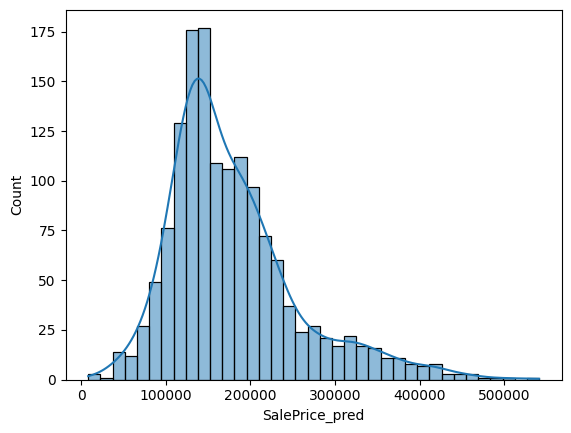

In [82]:
sns.histplot(data=res, x="SalePrice_pred", kde=True)

In [83]:
res.to_csv("RidgeBacwardResults.csv", index=False)